### Preamble

This notebook focuses on useful things to know about visualising things in Python. In the spirit of full disclosure, I should mention that I have no especial talent at visualisation - this notebook contains no secret key to incredibly impressive visuals. This is nothing more than a collection of code snippets and explanations that will hopefully make things easier for you.

I briefly considered entitling this notebook "Help! They think I'm a data scientist (Visualisation)", but this was forbidden by the people who think I'm a data scientist. Regardless of the title, this will hopefully allow you to either understand visualisation, or fake it well enough that no one notices.

### Imports 

In [1]:
import random as rnd  # For new dataset creation

import pandas as pd  # For data manipulation

import seaborn as sns  # For visualisation

import matplotlib.pyplot as plt  # For more complicated visualisation

from mpl_toolkits.mplot3d import Axes3D  # For 3D plots

### Data creation

For the purposes of this notebook, a completely fake dataset will be used. The code below constructs it.

I could have used a fake dataset, but I find this sort of hacky thing much more fun.

In [2]:
def make_fake_row():
    arr = [rnd.randint(-100, 100),
           rnd.random(),
           rnd.choice(["Europe", "Asia", "Africa",
                       "North America", "South America"]),
           rnd.randint(0, 5),
           rnd.randint(0, 1000000),
           rnd.choice(["Y", "N"]),
           f"Priority {rnd.randint(1,5)}",
           rnd.random(),
           rnd.randint(-500, 80000)]
    return arr

df = pd.DataFrame(columns=["A", "B", "C", "D", "E", "F", "G", "H", "I"],
                  data= [make_fake_row() for x in range(0, 100)])

In [3]:
# Inspect the data

df.head(5)

,A,B,C,D,E,F,G,H,I
0,81,0.619818,Europe,5,428818,Y,Priority 4,0.241135,7211
1,-49,0.732984,Africa,1,644211,Y,Priority 5,0.950477,42098
2,-76,0.977201,Europe,2,682662,Y,Priority 5,0.337485,74806
3,57,0.433205,Africa,2,887848,Y,Priority 3,0.669492,3494
4,35,0.430141,Europe,1,417264,N,Priority 3,0.847372,46165


The dataset has 100 rows and contains a mix of numerical and categorical data.

### Basic visualisation 

This section uses countplots to demonstrate some of the basic tricks.

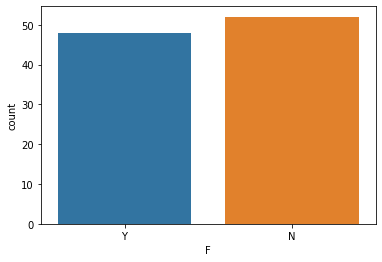

In [4]:
# countplot

sns.countplot(x="F", data=df)

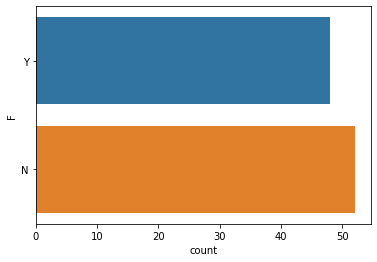

In [5]:
# Much cooler sideways countplot

sns.countplot(y="F", data=df)

Note that the line of code above has the same result as 

`sns.countplot(y=df["F"])`

You can call the function in either way, but I would strongly
suggest passing data as a separate parameter - it's much neater
and makes it easier to swap things in and out.

The `df["col name"]` pattern is useful when plotting data from two
different sets on the same visualisation, but mostly is just a bit
uglier and harder to read.

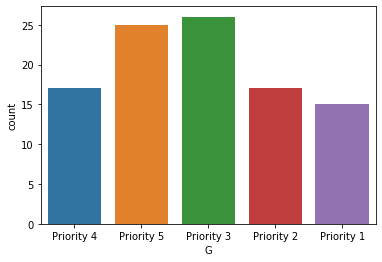

In [6]:
# Countplot for a column with >2 categories

sns.countplot(x="G", data=df)

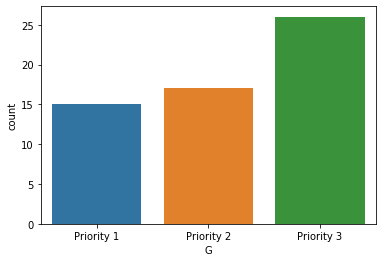

In [7]:
# Countplot for a column with >2 categories with the columns
# in the right order

sns.countplot(x="G", order=["Priority 1", "Priority 2",
                            "Priority 3"], data=df)

To display categorical data in a specific order, pass the `order` property to the function. This should take a list of the values in the order that you want them to display. If you only put some of the values into `order`, the others will be omitted from the output, which is convenient.

When you later wish to control the order of colours for categories, `hue_order` functions similarly.

### Slightly less basic visualisations

This section uses scatterplots to demonstrate some useful but slightly more complex things. Many of the techniques can be applied to other plots.

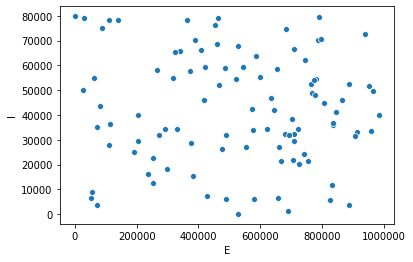

In [8]:
# Standard scatterplot

sns.scatterplot(x="E", y="I", data=df)

The key takeaway here is that Seaborn will let you make an awful lot of different kinds of plot simply by changing the function name. I'm easily confused, so I tend to keep things relatively simple, but there's a lot of power there.

Text(0.5, 0, 'X axis')

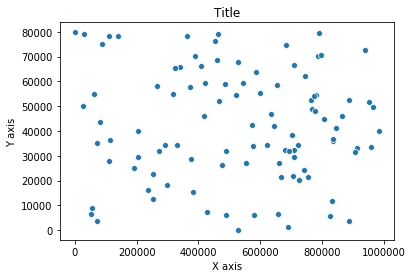

In [9]:
# Fancier plot with titles

plot = sns.scatterplot(x="E", y="I", data=df)

plot.set_title("Title")

plot.set_ylabel("Y axis")

plot.set_xlabel("X axis")

Text(0.5, 0, 'X axis')

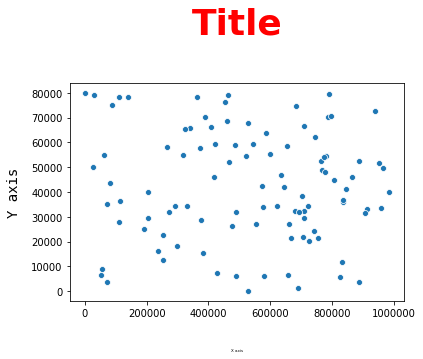

In [10]:
# Even fancier plot with titles

plot = sns.scatterplot(x="E", y="I", data=df)

plot.set_title("Title", pad=50,
               fontsize=36,
               fontdict={"weight": "bold",
                         "color": "red"})

plot.set_ylabel("Y axis", labelpad=10, fontsize=14,
                fontdict={"family": "monospace"})

plot.set_xlabel("X axis", labelpad=30, fontsize=4)

Obviously the above is hideous - I am apparently incapable of creating beauty. However, the code does demonstrate several key principles.

Use `pad` and `labelpad` to move titles and labels away from your visualisation. This helps avoid clutter.

Use `fontsize` to change the size of titles & labels, and use `fontdict` to change many more things.

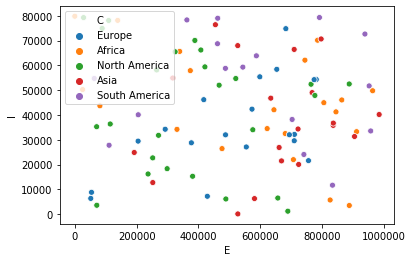

In [11]:
# scatterplot with coloured bobbles

sns.scatterplot(x="E", y="I", hue="C", data=df)

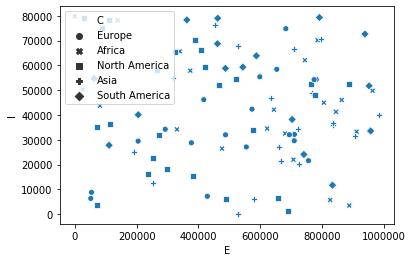

In [12]:
# scatterplot with shaped bobbles

sns.scatterplot(x="E", y="I", style="C", data=df)

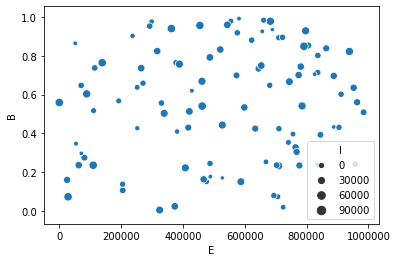

In [13]:
# scatterplot with sized bobbles

sns.scatterplot(x="E", y="B", size="I", data=df)

You can combine `style` and `hue` and `size` into one plot, if you really want, but it will make things extremely cluttered. Katie strongly disapproves of such behaviour.

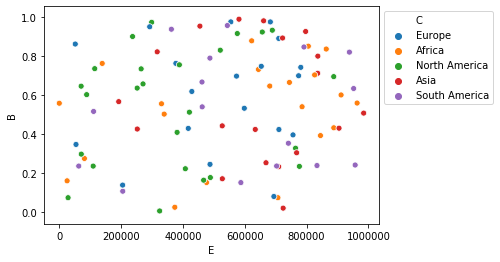

In [14]:
# Moving the legend outside the plot

plot = sns.scatterplot(x="E", y="B", hue="C", data=df)

plot.legend(bbox_to_anchor=(1, 1), loc=2)

`.legend` provides a lot of (confusing and oddly-documented) options for controlling the placement and appearance of the legend. It's worth playing around with, but the defaults used above should shift the legend out of the way.

(50000, 100000)

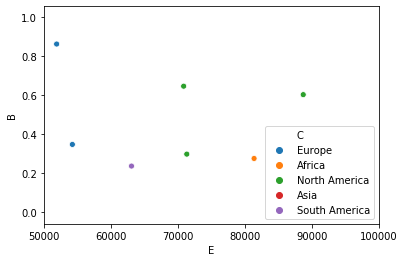

In [15]:
# Limiting the axes so you can only plot part of the data

plot = sns.scatterplot(x="E", y="B", hue="C", data=df)

# Choose the start and stop points
plot.set_xlim(50000, 100000)

# This also works with set_ylim

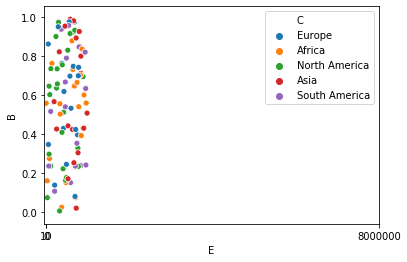

In [16]:
# Setting the ticks

plot = sns.scatterplot(x="E", y="B", hue="C", data=df)

# Provide a list of ticks (these do not have to be reasonable)
plot.set_xticks([0, 10, 8000000])

# Also works with set_yticks

[Text(0, 0, '-200K'),
 Text(0, 0, '0K'),
 Text(0, 0, '200K'),
 Text(0, 0, '400K'),
 Text(0, 0, '600K'),
 Text(0, 0, '800K'),
 Text(0, 0, '1,000K'),
 Text(0, 0, '1,200K')]

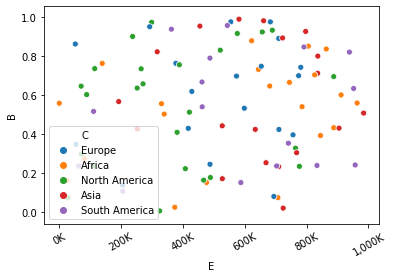

In [17]:
# Format the ticks

plot = sns.scatterplot(x="E", y="B", hue="C", data=df)

# This is just one example

# Grab the ticks

ticks = plot.get_xticks()

# create a new formatted list

new_ticks = ['{:,.0f}'.format(x/1000) + 'K' for x in ticks]

# Pass the formatted list back in

plot.set_xticklabels(new_ticks, rotation=30)

# Also, note the label rotation above - it clears up cluttered axes

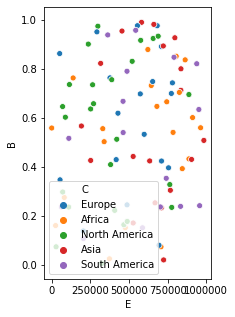

In [18]:
# Resize the visualisation

plt.figure(figsize=(3,5))  # Goes before the plot is created

plot = sns.scatterplot(x="E", y="B", hue="C", data=df)

# There is a seaborn-specific way to do this too, but this one is more versatile and easy to remember

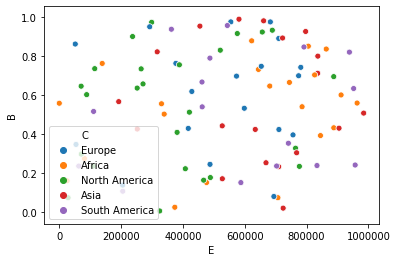

In [19]:
# Export the visualisation to a file

plot = sns.scatterplot(x="E", y="B", hue="C", data=df)

plot.get_figure().savefig("Maurissa's visualisation.png")

# If you are visualising in Matplotlib directly, not using Seaborn, you can generally use .savefig() on its own
# and skip the .get_figure() first

# If you are trying to save a visualisation with an external legend, just pass bbox_inches='tight' to .savefig()
# This stops the legend getting cut off

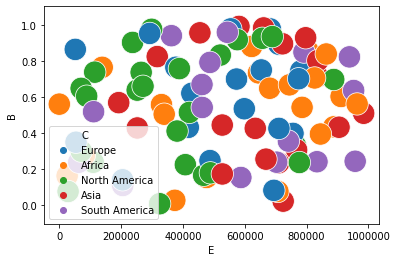

In [20]:
# Make data points larger

plot = sns.scatterplot(x="E", y="B", hue="C", data=df, s=500)

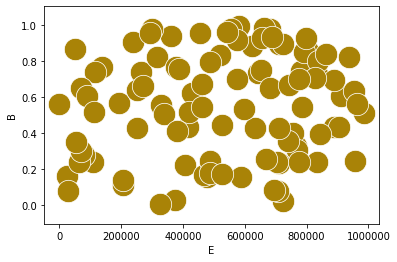

In [21]:
# Change the colour of all data points to a single colour

plot = sns.scatterplot(x="E", y="B", data=df, s=500, c=["#a98307"])

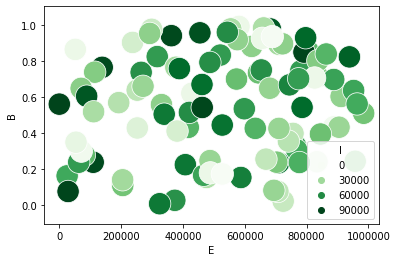

In [22]:
# Change the palette for the hues to a defined palette

plot = sns.scatterplot(x="E", y="B", data=df, s=500, hue="I", palette="Greens")

You can find a list of acceptable values for `palette` [here](https://matplotlib.org/examples/color/colormaps_reference.html).

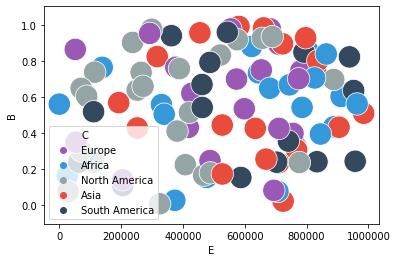

In [23]:
# Make and use your own palette

# Define the palette - pass a list of colours
example_palette = sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"])

# Apply the custom colour scheme
plot = sns.scatterplot(x="E", y="B", data=df, s=500, hue="C", palette=example_palette)

### Debatably useful things

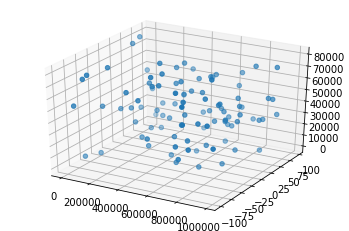

In [24]:
# Make a 3D scatterplot. Minimal use, but looks cool

# Uses Matplotlib directly

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=df["E"], ys=df["A"], zs=df["I"])

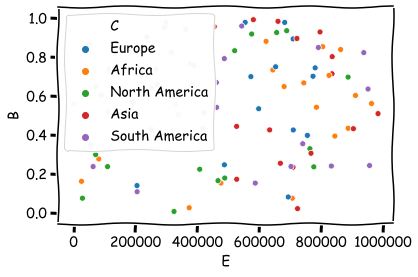

In [25]:
# Make a plot look hand-drawn

with plt.xkcd():
    plot = sns.scatterplot(x="E", y="B", hue="C", data=df)